In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from PIL import Image
import os

In [3]:
file_path = '../data/preprocessing/train_filtered.csv'

try:
    df_single = pd.read_csv(file_path, parse_dates=['date'])
    df_single = df_single.set_index('date').sort_index()
    print(f"Файл успешно загружен. Формат: {df_single.shape}")
except FileNotFoundError:
    print(f"Ошибка: Файл {file_path} не найден. Сначала запустите скрипт фильтрации.")
    exit()

# Параметры для заголовков
STORE_ID = 1
FAMILY = 'BEVERAGES'

df_single.head(20)

Файл успешно загружен. Формат: (1677, 7)


,sales,onpromotion,dcoilwtico,transactions,dayofweek,is_weekend,is_holiday_overall
date,,,,,,,
2013-01-01,0.0,0,93.14,0.0,1,0,1
2013-01-02,1091.0,0,93.14,2111.0,2,0,0
2013-01-03,919.0,0,92.97,1833.0,3,0,0
2013-01-04,953.0,0,93.12,1863.0,4,0,0
2013-01-05,1160.0,0,93.12,1509.0,5,1,1
2013-01-06,407.0,0,93.12,520.0,6,1,0
2013-01-07,1158.0,0,93.20,1807.0,0,0,0
2013-01-08,1029.0,0,93.21,1869.0,1,0,0
2013-01-09,1186.0,0,93.08,1910.0,2,0,0


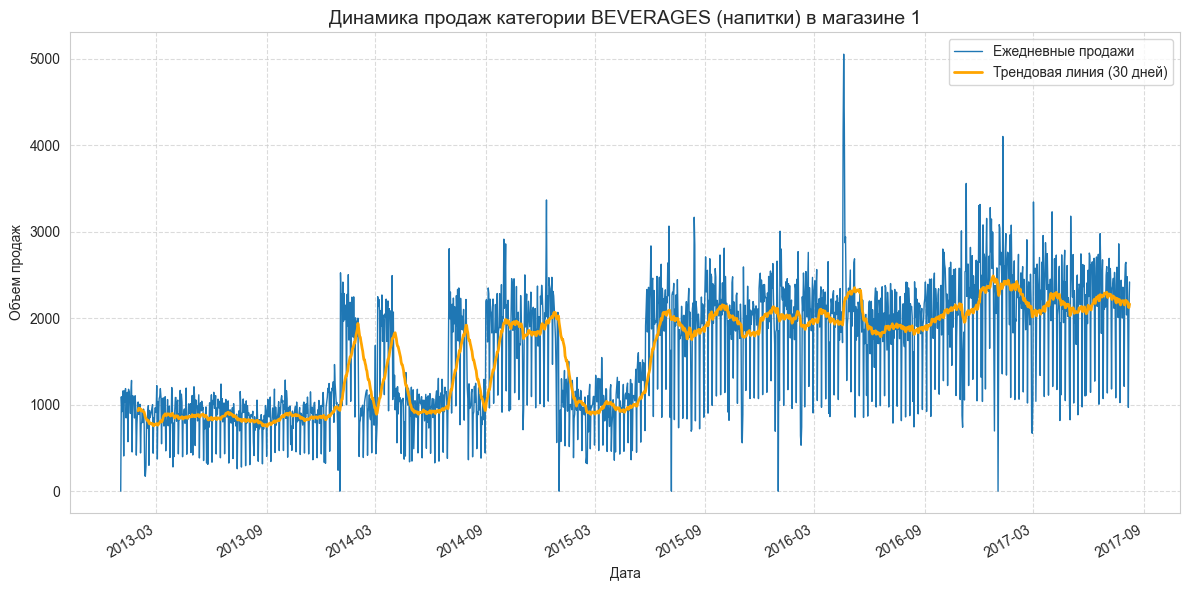

In [4]:
# Динамика продаж
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_single.index, df_single['sales'], linewidth=1, label='Ежедневные продажи')

ax.plot(df_single['sales'].rolling(window=30).mean(), color='orange', linewidth=2, label='Трендовая линия (30 дней)')

ax.set_title(f'Динамика продаж категории {FAMILY} (напитки) в магазине {STORE_ID}', fontsize=14)
ax.set_xlabel('Дата')
ax.set_ylabel('Объем продаж')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=30, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


DataFrame за последние 2 года: (585, 7)
Диапазон дат за последние 2 года: 2016-01-01 00:00:00 - 2017-08-08 00:00:00


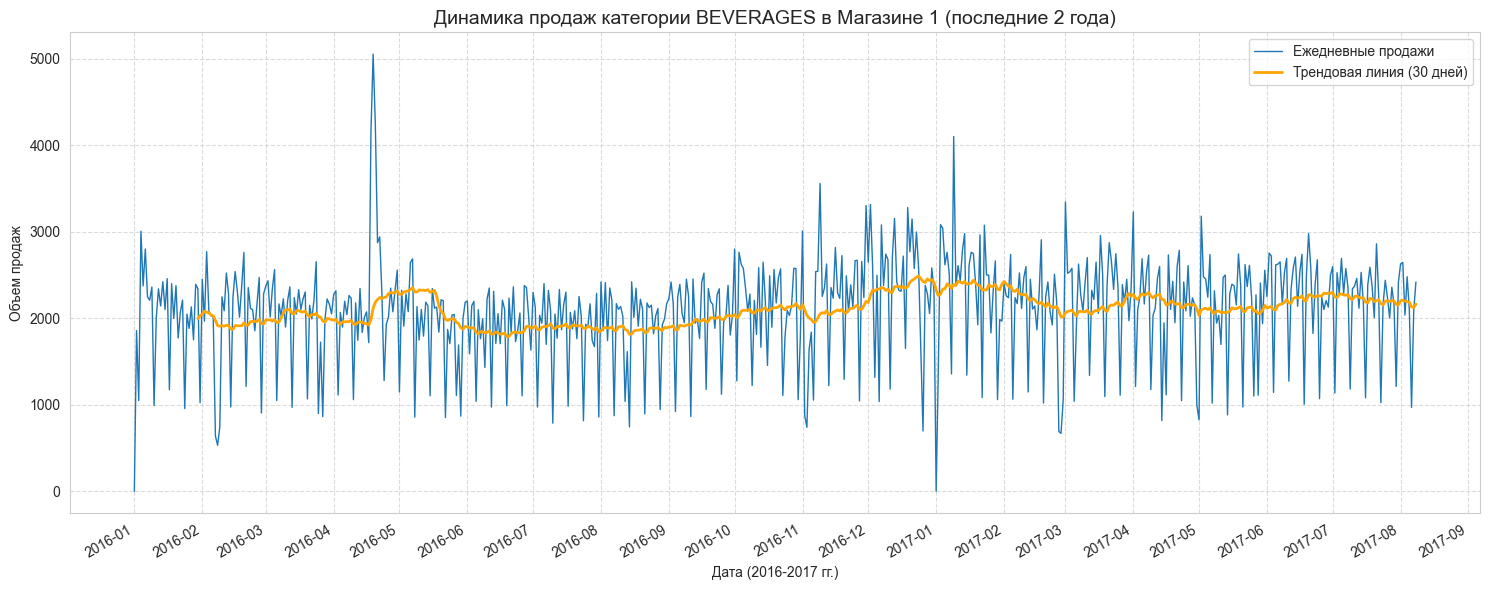

In [68]:
# Динамика продаж за последние два года

# 1. Фильтрация данных для последних двух лет
# Метод .last('2Y') возвращает последние 2 года данных
df_last_two_years = df_single.last('2Y')

# Вывод информации о новом DataFrame
print(f"\nDataFrame за последние 2 года: {df_last_two_years.shape}")
print(f"Диапазон дат за последние 2 года: {df_last_two_years.index.min()} - {df_last_two_years.index.max()}")


# 2. Построение графика
fig, ax = plt.subplots(figsize=(15, 6))

# Ежедневные продажи (синяя линия)
ax.plot(df_last_two_years.index, df_last_two_years['sales'], linewidth=1, label='Ежедневные продажи')

# Трендовая линия (Сглаживание 30 дней, оранжевая линия)
ax.plot(df_last_two_years['sales'].rolling(window=30).mean(), color='orange', linewidth=2, label='Трендовая линия (30 дней)')

# --- Настройка Оси X для отображения дат ---
ax.set_title(f'Динамика продаж категории {FAMILY} в Магазине {STORE_ID} (последние 2 года)', fontsize=14)
ax.set_xlabel(f'Дата ({df_last_two_years.index.min().year}-{df_last_two_years.index.max().year} гг.)')
ax.set_ylabel('Объем продаж')

# Форматирование оси X: Отображаем года и месяцы
# Для 2 лет достаточно меток раз в 3-6 месяцев
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # Метки каждые 3 месяца
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # Формат Год-Месяц

# Поворот меток для лучшей читаемости
plt.xticks(rotation=30, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

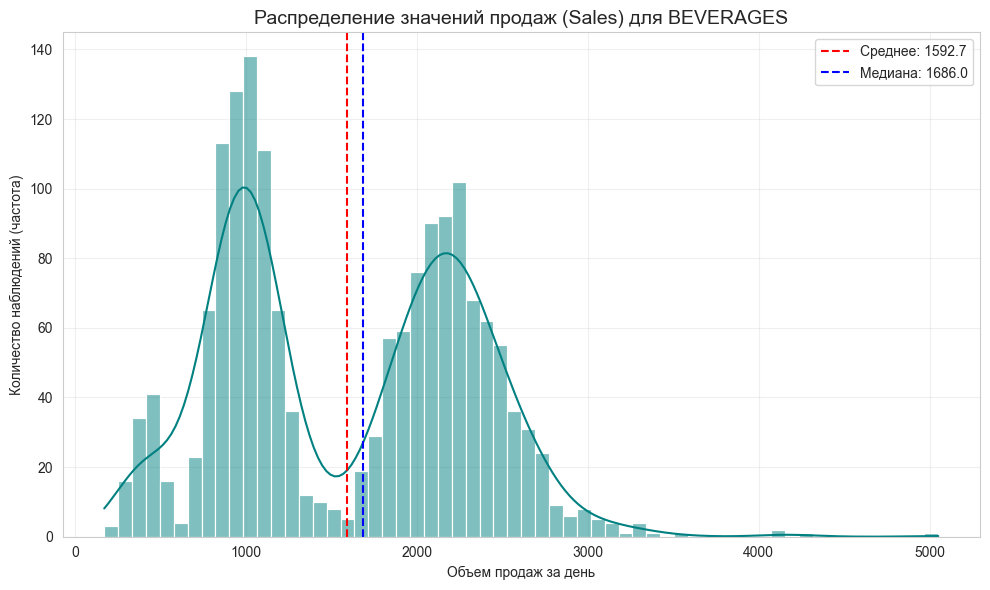


Статистика продаж для BEVERAGES в магазине 1:
count    1671.000000
mean     1592.740874
std       722.363931
min       172.000000
25%       971.000000
50%      1686.000000
75%      2206.000000
max      5051.000000
Name: sales, dtype: float64


In [9]:
# Гистограмма распределения (Остается прежним)
plt.figure(figsize=(10, 6))
sales_clean = df_single['sales'][df_single['sales'] > 0]
sns.histplot(sales_clean, bins=60, kde=True, color='teal')
plt.title(f'Распределение значений продаж (Sales) для {FAMILY}', fontsize=14)
plt.xlabel('Объем продаж за день')
plt.ylabel('Количество наблюдений (частота)')
plt.grid(True, alpha=0.3)
plt.axvline(sales_clean.mean(), color='red', linestyle='--', label=f'Среднее: {sales_clean.mean():.1f}')
plt.axvline(sales_clean.median(), color='blue', linestyle='--', label=f'Медиана: {sales_clean.median():.1f}')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nСтатистика продаж для {FAMILY} в магазине {STORE_ID}:")
print(sales_clean.describe())

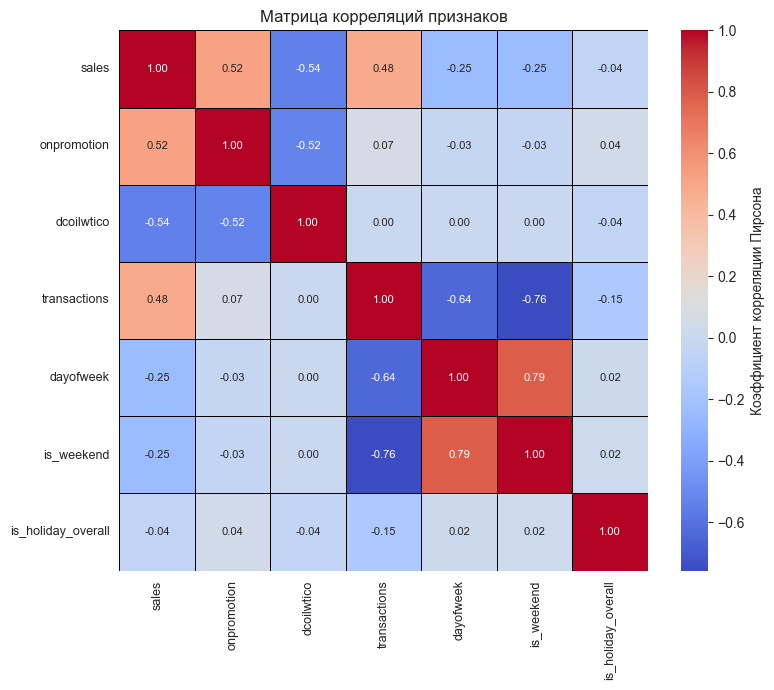


Корреляция с целевой переменной 'sales':
sales                 1.000000
onpromotion           0.524560
transactions          0.484112
is_holiday_overall   -0.044027
dayofweek            -0.246076
is_weekend           -0.246437
dcoilwtico           -0.541805
Name: sales, dtype: float64


In [83]:
df_corr_numeric = df_single.select_dtypes(include=[np.number])

correlation_matrix = df_corr_numeric.corr(method='pearson')

plt.figure(figsize=(8, 7))
sns.heatmap(
    correlation_matrix,
    annot=True,          # Показывать значения корреляции на ячейках
    fmt=".2f",           # Формат чисел (2 знака после запятой)
    cmap='coolwarm',     # Цветовая схема (от синего к красному)
    linewidths=.5,       # Разделительные линии
    linecolor='black',
    cbar_kws={'label': 'Коэффициент корреляции Пирсона'},
    annot_kws={"fontsize": 8}
)

plt.title('Матрица корреляций признаков', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9, rotation=0)
plt.tight_layout()
plt.savefig('correlation_matrix_high_res.png', dpi=1500, bbox_inches='tight')
plt.show()

print("\nКорреляция с целевой переменной 'sales':")
print(correlation_matrix['sales'].sort_values(ascending=False))


In [7]:
df_stats = df_single.select_dtypes(include=[np.number])

descriptive_stats = df_stats.describe()

print("\n" + "="*80)
print("ОПИСАТЕЛЬНАЯ СТАТИСТИКА ВСЕХ ПРИЗНАКОВ (DF_SINGLE)")
print("="*80)
print(descriptive_stats.round(2).to_string())

print("\n" + "-"*40)
print("ОПИСАТЕЛЬНАЯ СТАТИСТИКА ЦЕЛЕВОЙ ПЕРЕМЕННОЙ 'SALES'")
print("-" * 40)
print(descriptive_stats.loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], ['sales']].round(2).to_string())



ОПИСАТЕЛЬНАЯ СТАТИСТИКА ВСЕХ ПРИЗНАКОВ (DF_SINGLE)
         sales  onpromotion  dcoilwtico  transactions  dayofweek  is_weekend  is_holiday_overall
count  1677.00      1677.00     1677.00       1677.00     1677.0     1677.00             1677.00
mean   1587.04         9.43       68.01       1517.60        3.0        0.29                0.09
std     727.32        14.50       25.70        512.77        2.0        0.45                0.28
min       0.00         0.00       26.19          0.00        0.0        0.00                0.00
25%     970.00         0.00       46.32       1322.00        1.0        0.00                0.00
50%    1671.00         2.00       53.45       1746.00        3.0        0.00                0.00
75%    2206.00        14.00       95.78       1832.00        5.0        1.00                0.00
max    5051.00        84.00      110.62       3023.00        6.0        1.00                1.00

----------------------------------------
ОПИСАТЕЛЬНАЯ СТАТИСТИКА ЦЕЛЕВОЙ П

In [8]:
csv_file_path = '../models/fedot_experiments/summary_all_timeouts.csv'
df_summary = pd.read_csv(csv_file_path)

print("Исходные данные из summary_all_timeouts.csv:")
print(df_summary.head(21))
print("\n" + "="*45 + "\n")

# Сгруппируем данные по 'timeout' и вычислим средние значения для метрик
# Выбираем колонки с метриками
metrics_cols = ['rmse', 'mae', 'r2']

# Группируем по 'timeout' и вычисляем среднее для каждой метрики
df_mean_by_timeout = df_summary.groupby('timeout')[metrics_cols].mean()

df_mean_by_timeout.columns = ['RMSE_mean', 'MAE_mean', 'R2_mean']

df_mean_by_timeout = df_mean_by_timeout.reset_index()
df_mean_by_timeout = df_mean_by_timeout.round(3)

print("Средние значения метрик по лимиту времени (timeout):")
print(df_mean_by_timeout.to_string(index=False))

Исходные данные из summary_all_timeouts.csv:
    seed  timeout     rmse      mae     r2
0     20        1  174.282  140.561  0.873
1     20        5  186.201  156.401  0.855
2     20       10  186.625  156.847  0.849
3     20       15  194.322  162.574  0.842
4     20       30  178.134  144.298  0.867
5     20       60  181.586  147.121  0.862
6     20      120  190.403  156.119  0.848
7     30        1  174.282  140.561  0.873
8     30        5  174.276  140.548  0.873
9     30       10  173.347  140.099  0.874
10    30       15  174.269  140.534  0.873
11    30       30  174.273  140.542  0.873
12    30       60  168.592  136.859  0.881
13    30      120  181.676  145.559  0.862
14    42        1  169.167  130.776  0.880
15    42        5  174.282  140.561  0.873
16    42       10  174.507  140.563  0.873
17    42       15  174.270  140.536  0.873
18    42       30  179.641  150.884  0.865
19    42       60  174.273  140.541  0.873
20    42      120  166.041  134.606  0.885


Средние

In [13]:
MODEL_NAME = "Fedot"

df_filtered = df_summary[df_summary['timeout'] == 5]

# Расчет среднего и стандартного отклонения
metrics_cols = ['rmse', 'mae', 'r2']

# Вычисляем среднее
df_mean = df_filtered[metrics_cols].mean()

# Вычисляем стандартное отклонение
df_std = df_filtered[metrics_cols].std()

print(f"Сводные результаты {MODEL_NAME} (timeout=5 мин)")

# RMSE
mean_rmse = df_mean['rmse']
std_rmse = df_std['rmse']
print(f"Средний RMSE: {mean_rmse:.3f} +/- {std_rmse:.3f}")

# MAE
mean_mae = df_mean['mae']
std_mae = df_std['mae']
print(f"Средний MAE: {mean_mae:.3f} +/- {std_mae:.3f}")

# R^2
mean_r2 = df_mean['r2']
std_r2 = df_std['r2']
print(f"Средний R^2: {mean_r2:.3f} +/- {std_r2:.3f}")

Сводные результаты Fedot (timeout=5 мин)
Средний RMSE: 178.253 +/- 6.883
Средний MAE: 145.837 +/- 9.149
Средний R^2: 0.867 +/- 0.010


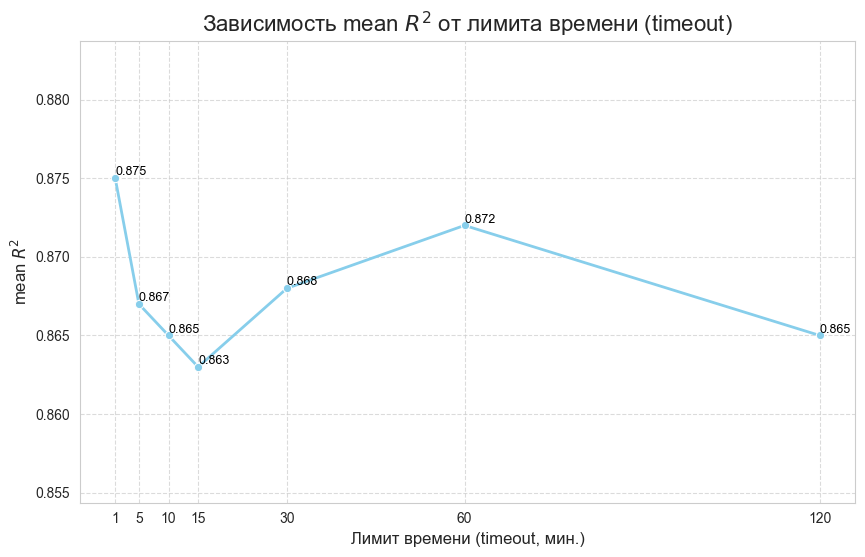

In [37]:
# Построение графика R2_mean от timeout ---

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_mean_by_timeout, x='timeout', y='R2_mean', marker='o', color='skyblue', linewidth=2)

plt.title('Зависимость mean $R^2$ от лимита времени (timeout)', fontsize=16)
plt.xlabel('Лимит времени (timeout, мин.)', fontsize=12)
plt.ylabel('mean $R^2$', fontsize=12)

for index, row in df_mean_by_timeout.iterrows():
    plt.text(row['timeout'], row['R2_mean'], f"{row['R2_mean']:.3f}",
             color='black', ha="left", va="bottom", fontsize=9)

plt.xticks(df_mean_by_timeout['timeout'])

min_r2 = df_mean_by_timeout['R2_mean'].min()
max_r2 = df_mean_by_timeout['R2_mean'].max()
plt.ylim(min_r2 * 0.99, max_r2 * 1.01) # Даем небольшой запас

plt.grid(True, linestyle='--', alpha=0.7)

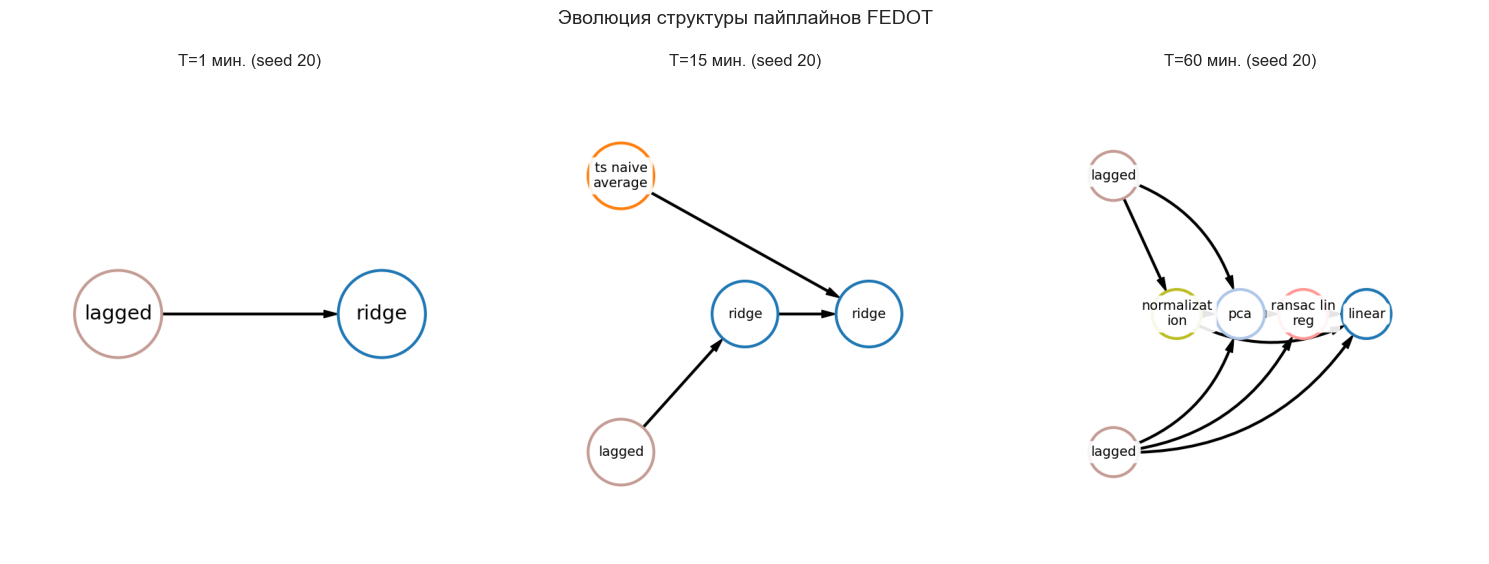

In [49]:
image_path = '../models/fedot_experiments'

image = [
    (1, 20),
    (15, 20),
    (60, 20)
]

def show_pipeline_images():
    fig, axes = plt.subplots(1, len(image), figsize=(15, 6))

    if len(image) == 1:
        axes = [axes]

    for i, (timeout, seed) in enumerate(image):
        filename = f'pipeline_graph_timeout_{timeout}_seed_{seed}.png'
        file_path = os.path.join(image_path, f'timeout_{timeout}', filename)

        try:
            img = Image.open(file_path)
            axes[i].imshow(img)
            axes[i].set_title(f'T={timeout} мин. (seed {seed})')
            axes[i].axis('off') # Убираем оси

        except FileNotFoundError:
            axes[i].text(0.5, 0.5, f"Файл не найден:\n{file_path}",
                         ha='center', va='center', color='red')
            axes[i].set_title(f'T={timeout} мин. (Ошибка)')
            axes[i].axis('off')

    plt.suptitle('Эволюция структуры пайплайнов FEDOT', fontsize=14)
    plt.tight_layout()
    plt.show()

show_pipeline_images()